In [ ]:
import time
# Here is the start time
start_time = time.time()

# Download the test image and utils files
!pip install opencv-python
!git clone https://github.com/madmaze/pytesseract.git
!cd pytesseract && pip install -U .


!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py
!sudo apt install tesseract-ocr

# These imports let you use opencv
import cv2
import common
import numpy as np
import pytesseract

# The following are to do with this interactive notebook code
%matplotlib inline
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

fatal: destination path 'pytesseract' already exists and is not an empty directory.
Processing /content/pytesseract
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pytesseract: filename=pytesseract-0.3.13-py3-none-any.whl size=14705 sha256=a95a70e7de6306767297b01f389537fc7524197a053e7bf0b9548eb105805fb1
  Stored in directory: /tmp/pip-ephem-wheel-cache-rlr3mfoe/wheels/80/83/2a/d4f0f1bea1745e6185266931210ae671f8e6fc761abfcc1f02
Successfully built pytesseract
  Attempting uninstall: pytesseract
    Found existing installation: pytesseract 0.3.13
    Uninstalling pytesseract-0.3.13:
      Successfully uninstalled pytesseract-0.3.13
--2024-10-12 08:02:10--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting 

In [ ]:
# Mount Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Test the version of python
!python --version

Python 3.10.12


In [ ]:
# Find the tesseract
!whereis tesseract

tesseract: /usr/bin/tesseract /usr/share/man/man1/tesseract.1.gz


In [ ]:
# Configure the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

In [ ]:
# Read the image
image = cv2.imread('/content/drive/My Drive/images/example2.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

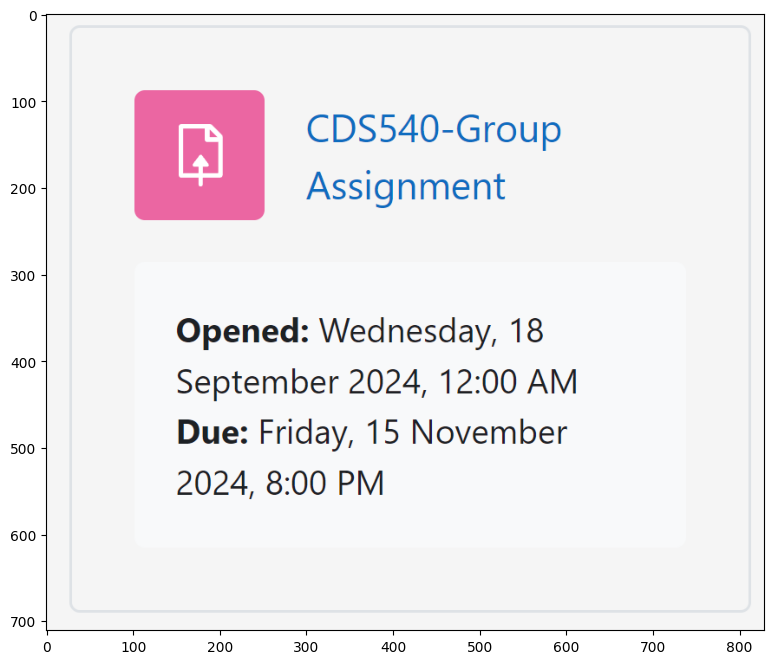

In [ ]:
# In Google colab，we need to print images using plt.imshow()
plt.imshow(image)

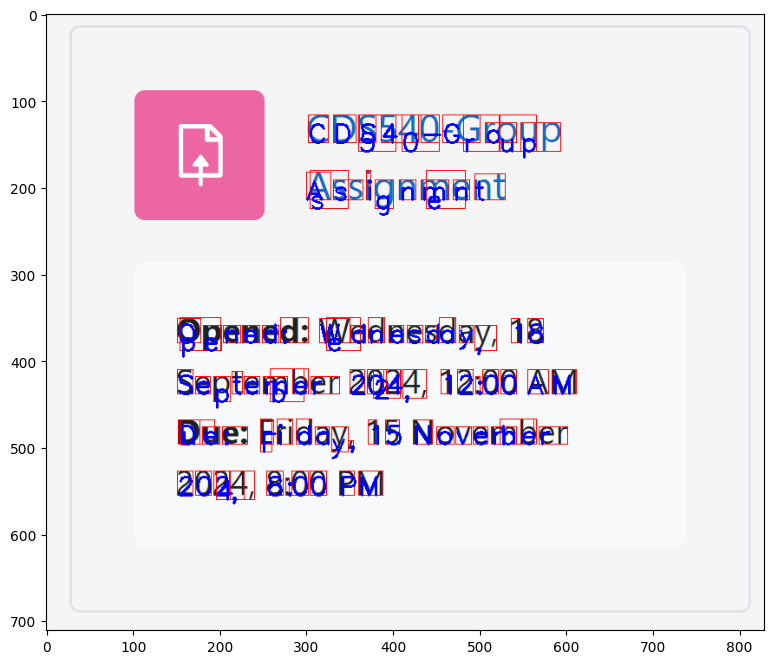

In [ ]:
# Record the height and width of the image (This is 2D image so we do not need the third value)
H,W,C = image.shape

# Text detection and recognition using Tesseract
text = pytesseract.image_to_string(image)

# Rectangle letters using Tesseract
boxes = pytesseract.image_to_boxes(image)
for b in boxes.splitlines():
  b = b.split(" ")
  x1,y1,x2,y2 = int(b[1]),int(b[2]),int(b[3]),int(b[4])
  cv2.rectangle(image,(x1,H-y1),(x2,H-y2),(255,0,0),1)
  cv2.putText(image,b[0],(x1,H-y1),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)

# Print the letters
plt.imshow(image)

In [ ]:
# Reset the image
image = cv2.imread('/content/drive/My Drive/images/example2.png')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# Rectangle words using Tesseract
boxes = pytesseract.image_to_data(image)
for x,b in enumerate(boxes.splitlines()):
  if x!=0:
    b = b.split()
    if len(b)==12:
      x,y,w,h = int(b[6]),int(b[7]),int(b[8]),int(b[9])
      cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),1)
      cv2.putText(image,b[11],(x,y),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,255),2)

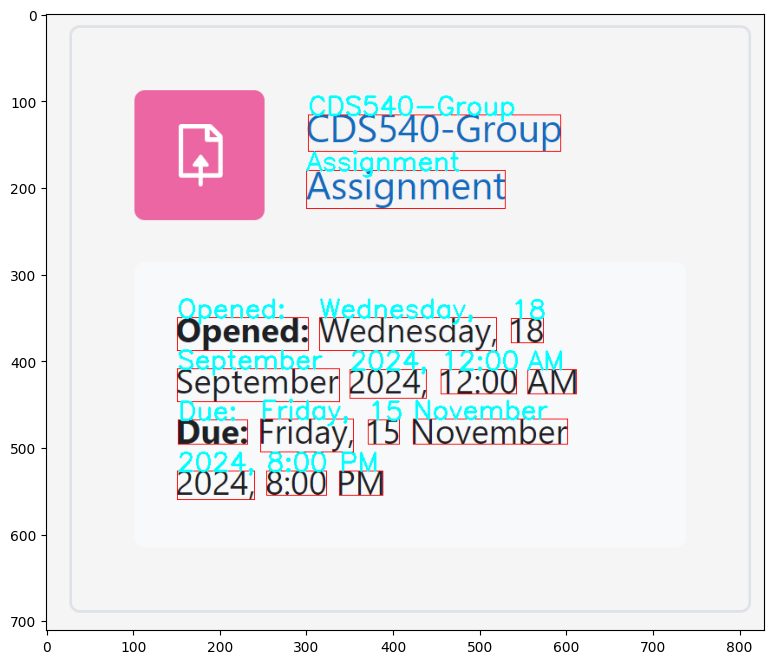

In [ ]:
# Print the words
plt.imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Here is the end time
end_time = time.time()
execution_time = end_time - start_time

# Print the execution time
print(f"Execution Time is", execution_time, "seconds")

Execution Time is 61.423871755599976 seconds
